In [1]:
!pip install gdown

In [ ]:
!gdown 1JDgLpem1jxqnkYROui7bf0y0F4iMzhne

In [ ]:
!unzip ibug_300W_large_face_landmark_dataset.zip

In [2]:
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import torch
import os

Understand the data

In [2]:
data_dir = './kaggle/working/ibug_300W_large_face_landmark_dataset/labels_ibug_300W.xml'
# read the data tree
tree = ET.parse(data_dir)
# get root of the data tree
root = tree.getroot()
# print the tag and corresponding attributes 
print(f"Root tag: {root.tag}, attributes: {root.attrib}")
# print the child of the root
for child in root:
    print(f"Tag: {child.tag}, attributes: {child.attrib}")


Root tag: dataset, attributes: {}
Tag: name, attributes: {}
Tag: comment, attributes: {}
Tag: images, attributes: {}


Working with the child named images

In [3]:
# get new root named images
images = root.find('images')
print(f"Tag: {images[0].tag}, attributes: {images[0].attrib}")
# see the inside of images
for box in images[0]:
    print(f"Tag: {box.tag}, attributes: {box.attrib}")
    for part in box:
        print(f"Tag: {part.tag}, attributes: {part.attrib}")

Tag: image, attributes: {'file': 'afw/1051618982_1.jpg', 'width': '1300', 'height': '1856'}
Tag: box, attributes: {'top': '206', 'left': '469', 'width': '216', 'height': '216'}
Tag: part, attributes: {'name': '00', 'x': '482', 'y': '267'}
Tag: part, attributes: {'name': '01', 'x': '483', 'y': '298'}
Tag: part, attributes: {'name': '02', 'x': '487', 'y': '329'}
Tag: part, attributes: {'name': '03', 'x': '491', 'y': '358'}
Tag: part, attributes: {'name': '04', 'x': '503', 'y': '386'}
Tag: part, attributes: {'name': '05', 'x': '523', 'y': '409'}
Tag: part, attributes: {'name': '06', 'x': '543', 'y': '428'}
Tag: part, attributes: {'name': '07', 'x': '565', 'y': '442'}
Tag: part, attributes: {'name': '08', 'x': '591', 'y': '447'}
Tag: part, attributes: {'name': '09', 'x': '620', 'y': '443'}
Tag: part, attributes: {'name': '10', 'x': '647', 'y': '429'}
Tag: part, attributes: {'name': '11', 'x': '671', 'y': '409'}
Tag: part, attributes: {'name': '12', 'x': '688', 'y': '385'}
Tag: part, attrib

Structure:
* Image(file, width, height):\n
* --box(top, left, width, height):\n
* ----part(name, x, y)\n

Get data

In [4]:
# return a dict contains data of an image
def get_image_data(image):
    image_data = {}
    image_data['image'] = image.attrib
    image_box = image.find('box')
    image_data['box'] = image_box.attrib
    parts = []
    for child in image_box:
        parts.append(child.attrib)
    image_data['parts'] = parts
    return image_data

In [5]:
# save all data of every images in a dict, return this dict
def get_data(images):
    data = {'file': [], 'img_width': [], 'img_height': [], 'box_top': [], 'box_left': [], 'box_width': [], 'box_height': [], 'parts': []}
    for image in images:
        image_data = get_image_data(image)
        data['file'].append(image_data['image']['file'])
        data['img_width'].append(float(image_data['image']['width']))
        data['img_height'].append(float(image_data['image']['height']))
        data['box_top'].append(float(image_data['box']['top']))
        data['box_left'].append(float(image_data['box']['left']))
        data['box_width'].append(float(image_data['box']['width']))
        data['box_height'].append(float(image_data['box']['height']))
        parts = []
        for part in image_data['parts']:
            parts.append([float(part['x']), float(part['y'])])
        data['parts'].append(parts)
    return data

In [6]:
data_dict = get_data(images)
data = pd.DataFrame(data_dict)

In [7]:
data

,file,img_width,img_height,box_top,box_left,box_width,box_height,parts
0,afw/1051618982_1.jpg,1300.0,1856.0,206.0,469.0,216.0,216.0,"[[482.0, 267.0], [483.0, 298.0], [487.0, 329.0..."
1,afw/111076519_1.jpg,2402.0,1824.0,724.0,1122.0,150.0,150.0,"[[1126.0, 765.0], [1123.0, 784.0], [1123.0, 80..."
2,afw/111076519_2.jpg,2402.0,1824.0,590.0,1028.0,180.0,180.0,"[[1050.0, 620.0], [1046.0, 641.0], [1040.0, 66..."
3,afw/1130084326_1.jpg,2048.0,1536.0,477.0,1537.0,259.0,259.0,"[[1603.0, 576.0], [1600.0, 604.0], [1598.0, 62..."
4,afw/1130084326_2.jpg,2048.0,1536.0,448.0,477.0,259.0,259.0,"[[472.0, 545.0], [472.0, 576.0], [474.0, 605.0..."
...,...,...,...,...,...,...,...,...
7669,lfpw/trainset/image_0867_mirror.jpg,1024.0,768.0,161.0,145.0,259.0,259.0,"[[135.0, 240.0], [133.0, 274.0], [133.0, 305.0..."
7670,lfpw/trainset/image_0868_mirror.jpg,300.0,400.0,132.0,87.0,181.0,180.0,"[[67.0, 190.0], [66.0, 215.0], [68.0, 246.0], ..."
7671,lfpw/trainset/image_0869_mirror.jpg,350.0,460.0,104.0,16.0,259.0,259.0,"[[51.0, 201.0], [50.0, 228.0], [54.0, 258.0], ..."
7672,lfpw/trainset/image_0870_mirror.jpg,407.0,594.0,126.0,147.0,150.0,151.0,"[[157.0, 149.0], [153.0, 167.0], [152.0, 186.0..."


In [8]:
data_dir_train = './kaggle/working/ibug_300W_large_face_landmark_dataset/labels_ibug_300W_train.xml'
data_dir_test = './kaggle/working/ibug_300W_large_face_landmark_dataset/labels_ibug_300W_test.xml'

images_train = ET.parse(data_dir_train).getroot().find('images')
images_test = ET.parse(data_dir_test).getroot().find('images')

data_dict_train = get_data(images_train)
pd_train = pd.DataFrame(data_dict_train)

data_dict_test = get_data(images_test)
pd_test = pd.DataFrame(data_dict_test)

In [9]:
pd_train

,file,img_width,img_height,box_top,box_left,box_width,box_height,parts
0,lfpw/trainset/image_0457.png,350.0,464.0,78.0,74.0,138.0,140.0,"[[55.0, 141.0], [59.0, 161.0], [66.0, 182.0], ..."
1,helen/trainset/2659264056_1.jpg,576.0,768.0,130.0,31.0,447.0,447.0,"[[107.0, 150.0], [99.0, 238.0], [97.0, 314.0],..."
2,helen/trainset/249852286_2.jpg,1169.0,1344.0,378.0,279.0,446.0,447.0,"[[260.0, 492.0], [269.0, 564.0], [276.0, 634.0..."
3,afw/281972218_1.jpg,1383.0,1238.0,247.0,878.0,259.0,259.0,"[[925.0, 341.0], [925.0, 369.0], [926.0, 399.0..."
4,helen/trainset/2948551782_1.jpg,3072.0,2048.0,693.0,940.0,1110.0,1111.0,"[[1060.0, 1025.0], [1081.0, 1180.0], [1121.0, ..."
...,...,...,...,...,...,...,...,...
6661,helen/trainset/2620748776_1_mirror.jpg,1200.0,797.0,40.0,405.0,600.0,590.0,"[[368.0, 179.0], [362.0, 267.0], [363.0, 369.0..."
6662,helen/trainset/2609109576_1_mirror.jpg,569.0,850.0,195.0,170.0,343.0,336.0,"[[152.0, 310.0], [150.0, 350.0], [153.0, 389.0..."
6663,lfpw/testset/image_0234_mirror.jpg,360.0,450.0,93.0,83.0,151.0,151.0,"[[97.0, 142.0], [98.0, 158.0], [102.0, 174.0],..."
6664,helen/trainset/2615918865_1_mirror.jpg,2986.0,2304.0,240.0,822.0,1332.0,1333.0,"[[1075.0, 732.0], [1050.0, 840.0], [1047.0, 95..."


In [10]:
pd_test

,file,img_width,img_height,box_top,box_left,box_width,box_height,parts
0,helen/trainset/146827737_1.jpg,640.0,790.0,224.0,70.0,295.0,295.0,"[[145.0, 355.0], [144.0, 382.0], [145.0, 407.0..."
1,ibug/image_105_01.jpg,1400.0,1024.0,475.0,491.0,151.0,150.0,"[[490.0, 478.0], [486.0, 500.0], [482.0, 521.0..."
2,lfpw/trainset/image_0735.png,372.0,372.0,64.0,133.0,125.0,125.0,"[[130.0, 99.0], [133.0, 117.0], [136.0, 135.0]..."
3,helen/trainset/1753022691_1.jpg,960.0,1214.0,328.0,279.0,446.0,447.0,"[[298.0, 408.0], [301.0, 472.0], [309.0, 534.0..."
4,helen/trainset/2547802012_1.jpg,1294.0,1218.0,328.0,427.0,447.0,447.0,"[[357.0, 497.0], [365.0, 558.0], [380.0, 616.0..."
...,...,...,...,...,...,...,...,...
1003,helen/testset/305917477_1_mirror.jpg,2263.0,2336.0,578.0,349.0,925.0,925.0,"[[288.0, 734.0], [256.0, 871.0], [243.0, 989.0..."
1004,lfpw/trainset/image_0579_mirror.jpg,450.0,300.0,122.0,119.0,105.0,105.0,"[[135.0, 153.0], [134.0, 166.0], [134.0, 177.0..."
1005,helen/testset/3155317888_1_mirror.jpg,1768.0,1768.0,473.0,581.0,643.0,643.0,"[[595.0, 638.0], [600.0, 721.0], [603.0, 800.0..."
1006,helen/trainset/2099144186_1_mirror.jpg,702.0,788.0,199.0,277.0,261.0,255.0,"[[244.0, 243.0], [230.0, 281.0], [217.0, 320.0..."


In [11]:
def visualize_image(data, idx):
    img = Image.open('./kaggle/working/ibug_300W_large_face_landmark_dataset/' + data['file'][idx]).convert("RGB")
    print(data['file'][idx])
    img = np.array(img)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    box = data[['box_left', 'box_top', 'box_width', 'box_height']].iloc[idx]
    rect = patches.Rectangle((box['box_left'], box['box_top']), box['box_width'], box['box_height'], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    parts_x = [x[0] for x in data['parts'][idx]]
    parts_y = [x[1] for x in data['parts'][idx]]
    ax.scatter(parts_x, parts_y, c='r', s=10)
    plt.show()


helen/trainset/2659264056_1.jpg


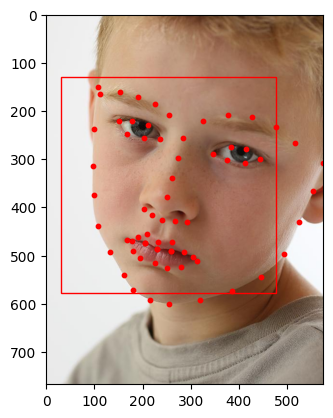

In [13]:
visualize_image(pd_train, 1)

In [14]:
# crop all image and relocate the corresponding part
def crop_data(data):
    # save the cropped_image
    cropped_images = []
    # list of parts of each image
    parts_list = []
    for idx in range(len(data)):
      count = 0
      # get the path of image
      image_path = './kaggle/working/ibug_300W_large_face_landmark_dataset/' + data['file'][idx]
      if os.path.exists(image_path):
        img = Image.open(image_path)
        # get the box data
        box = data[['box_left', 'box_top', 'box_width', 'box_height']].iloc[idx]
        # crop the image, only get the image inside the box
        try:
            cropped_img = img.crop((box['box_left'], box['box_top'], box['box_left'] + box['box_width'], box['box_top'] + box['box_height']))
            cropped_images.append(cropped_img)
            # relocate the parts after cropping
            relocated_parts = np.array(data['parts'][idx]) - np.array([box['box_left'], box['box_top']])
            parts_list.append(relocated_parts)
        except:
            print(data['file'][idx])
            count += 1
      else:
        print(data['file'][idx])
    print(count)
    return [cropped_images, parts_list]

In [15]:
x = crop_data(pd_train.iloc[:10])

lfpw/trainset/image_0457.png
afw/281972218_1.jpg
afw/3662810723_1.jpg
0


In [16]:
def visualize_image_preprocessing(data, idx):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from PIL import Image

    img = data[0][idx]
    img = np.array(img)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    parts = data[1][idx]
    ax.scatter(parts[:, 0], parts[:, 1], c='r', s=10)
    plt.show()

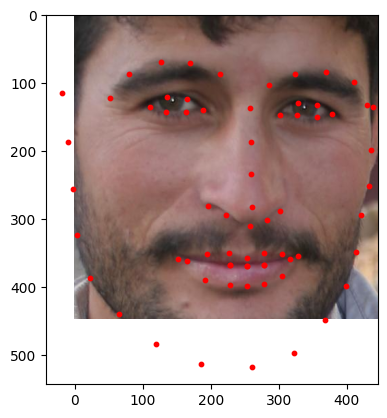

In [17]:
visualize_image_preprocessing(x, 1)

In [19]:
cropped_train = crop_data(pd_train)
cropped_test = crop_data(pd_test)

lfpw/trainset/image_0457.png
afw/281972218_1.jpg
afw/3662810723_1.jpg
lfpw/trainset/image_0144.png
lfpw/trainset/image_0106.png
lfpw/trainset/image_0431.png
lfpw/trainset/image_0298.png
lfpw/trainset/image_0800.png
lfpw/testset/image_0001.png
lfpw/testset/image_0231.png
lfpw/trainset/image_0159.png
lfpw/trainset/image_0650.png
lfpw/trainset/image_0804.png
afw/253915276_1.jpg
lfpw/trainset/image_0218.png
lfpw/trainset/image_0052.png
lfpw/trainset/image_0424.png
lfpw/trainset/image_0597.png
lfpw/testset/image_0189.png
lfpw/testset/image_0211.png
afw/2060241469_1.jpg
lfpw/trainset/image_0757.png
lfpw/testset/image_0119.png
lfpw/trainset/image_0101.png
lfpw/trainset/image_0290.png
lfpw/trainset/image_0329.png
lfpw/trainset/image_0567.png
lfpw/trainset/image_0449.png
lfpw/trainset/image_0644.png
lfpw/trainset/image_0487.png
lfpw/testset/image_0116.png
afw/5144909700_3.jpg
afw/539722510_1.jpg
lfpw/trainset/image_0355.png
afw/79378097_2.jpg
lfpw/trainset/image_0232.png
lfpw/trainset/image_035

In [24]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
transform_train = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
    A.Resize(height=256, width=256, always_apply=True),
    A.RandomCrop(height=224, width=224, always_apply=True),
    A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
#     A.Cutout(num_holes=8, max_h_size=18, max_w_size=18, p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))
transform_test = A.Compose([
    A.Resize(height=256, width=256, always_apply=True),
    A.CenterCrop(height=224, width=224, always_apply=True),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
], keypoint_params=A.KeypointParams(format='xy', remove_invisible=False))

INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.10 (you have 1.4.8). Upgrade using: pip install --upgrade albumentations


In [26]:
def norm_transform_dataset(images,landmarks,transform):
    final_images = []
    final_landmarks = []

    for i in range(len(images)):
        img = images[i]
        ldm = landmarks[i]

        img = np.array(img)
#         print(pd_train['file'][i])
#         print(img.shape)
        #transform
        if (img.ndim == 3):
            transformed = transform(image = img, keypoints = ldm)
            transformed_img = transformed['image']
            transformed_lmd = transformed['keypoints']

            #normalize
            color_channels, height, width = transformed_img.shape
            transformed_lmd = transformed_lmd / np.array([width, height]) - 0.5

            final_images.append(transformed_img)
            final_landmarks.append(transformed_lmd)

    return final_images, final_landmarks

In [27]:
def visualize_data(image,landmark):
    image_clone = image.copy()
    draw = ImageDraw.Draw(image_clone)
    for (x, y) in landmark:
        draw.ellipse((x-2, y-2, x+2, y+2), fill='blue', outline='blue')

    # Display the image
    plt.imshow(image_clone)
    plt.axis('off')  # Hide axes
    plt.show()

In [28]:
def visualize_final(transformed_cropped_image,normalized_transformed_landmarks ):
    # Define mean and std
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    # Reverse color transform
    def denormalize(image_tensor, mean=mean, std=std):
        # Clone and permute the tensor
        tmp = image_tensor.clone().permute(1, 2, 0)

        # Denormalize
        for t, m, s in zip(tmp, mean, std):
            t.mul_(s).add_(m)

        # Clamp the values
        return torch.clamp(tmp, 0, 1)
    cropped_image = denormalize(transformed_cropped_image)

    # Get size of cropped image
    cropped_image = (cropped_image.numpy() * 255).astype(np.uint8)
    height, width, color_channels = cropped_image.shape

    # Denormalize landmarks to pixel coordinates
    landmarks = (normalized_transformed_landmarks + 0.5) * np.array([width, height])

    visualize_data(Image.fromarray(cropped_image.astype(np.uint8)).convert('RGB'), landmarks)

In [29]:
final_images_train, final_landmarks_train = norm_transform_dataset(cropped_train[0], cropped_train[1],transform_train)

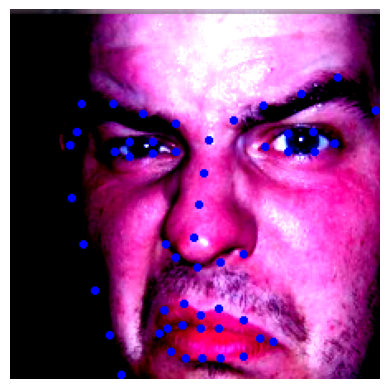

In [30]:
from random import randint
random_sample_number = randint(0,len(final_images_train))
visualize_final(final_images_train[random_sample_number], final_landmarks_train[random_sample_number])

In [31]:
final_images_test, final_landmarks_test = norm_transform_dataset(cropped_test[0], cropped_test[1],transform_test)

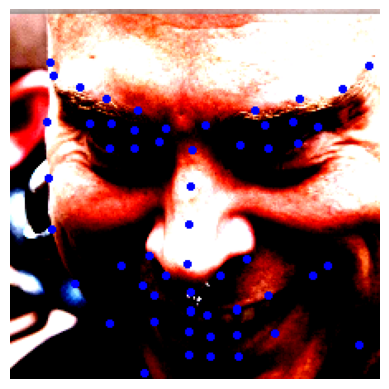

In [32]:
from random import randint
random_sample_number = randint(0,len(final_images_test))
visualize_final(final_images_test[random_sample_number], final_landmarks_test[random_sample_number])

In [35]:
final_images_train = torch.from_numpy(np.array(final_images_train[:])[:])
final_landmarks_train = torch.from_numpy(np.array(final_landmarks_train[:])[:])
final_images_test = torch.from_numpy(np.array(final_images_test[:])[:])
final_landmarks_test = torch.from_numpy(np.array(final_landmarks_test[:])[:])

In [36]:
final_images_train = final_images_train[:].float()
final_images_test = final_images_test[:].float()
final_landmarks_train = final_landmarks_train[:].float()
final_landmarks_test = final_landmarks_test[:].float()

In [37]:
print(final_images_train.shape)

torch.Size([4304, 3, 224, 224])


In [38]:
train_data = [(x,y) for x,y in zip(final_images_train[:], final_landmarks_train[:])]
test_data = [(x,y) for x,y in zip(final_images_test[:], final_landmarks_test[:])]

In [39]:
print(len(train_data))
print(len(test_data))

4304
596


In [41]:
from torch.utils.data import DataLoader    

BATCH_SIZE = 32

In [42]:
def load_data(train_data : list, test_data : list, batch_size = BATCH_SIZE):
    # Turn datasets into iterables (batches)
    train_dataloader = DataLoader(train_data, # dataset to turn into iterable
        batch_size=batch_size, # how many samples per batch? 
        shuffle=True # shuffle data every epoch?
    )
    test_dataloader = DataLoader(test_data,
        batch_size=batch_size,
        shuffle=False # don't necessarily have to shuffle the testing data
    )
    # Let's check out what we've created
    print(f"Dataloaders: {train_dataloader, test_dataloader}") 
    print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
    print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")
    return train_dataloader, test_dataloader

In [43]:
train_dataloader, test_dataloader = load_data(train_data, test_data)

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fc186bc9ff0>, <torch.utils.data.dataloader.DataLoader object at 0x7fc186bc9c90>)
Length of train dataloader: 135 batches of 32
Length of test dataloader: 19 batches of 32


In [44]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32, 68, 2]))

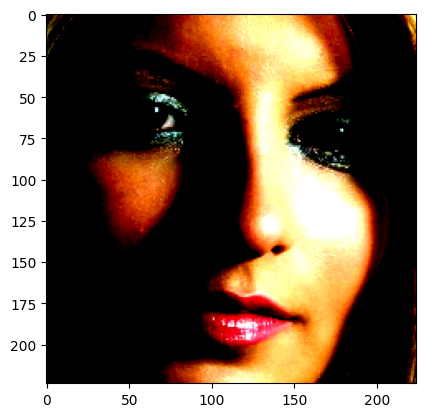

In [45]:
plt.imshow(train_features_batch[0].permute(1, 2, 0))


In [46]:
print(train_features_batch[0].shape)

torch.Size([3, 224, 224])


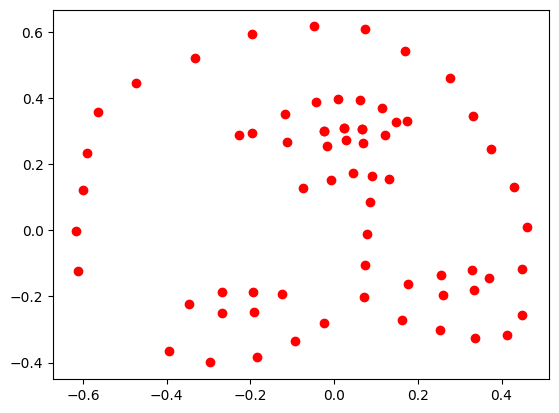

In [47]:
for landmark in train_labels_batch[0]:
    x, y = landmark
    plt.scatter(x, y, color='red')

In [3]:
from torch import nn, optim
import torchvision.models as models

In [4]:
import torch
import torch.nn as nn
from torchvision.models import resnet50

class LandmarkDetector(nn.Module):
    def __init__(self):
        super(LandmarkDetector, self).__init__()

        # Load ResNet50 with pretrained weights
        self.resnet50 = resnet50(weights='DEFAULT')

        # Remove the original fully connected layer (fc)
        self.resnet50 = nn.Sequential(*list(self.resnet50.children())[:-1])

        # Global Average Pooling and Fully Connected Layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))  
        self.fc = nn.Linear(2048, 136)  # 2048 from ResNet50's last layer

    def forward(self, x):
        x = self.resnet50(x)  # Extract features using ResNet50
        x = self.global_avg_pool(x)  # Reduce spatial dimensions
        x = torch.flatten(x, 1)  # Flatten for fully connected layer
        x = self.fc(x)         # Predict 136 values (68 landmarks * 2 coordinates)
        x = x.view(-1, 68, 2)   # Reshape into landmark coordinates
        return x



In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [6]:
# Khởi tạo mô hình
model_ultra = LandmarkDetector()
# Chuyển mô hình và dữ liệu lên GPU nếu có
device = torch.device("cuda:0")
# Khởi tạo optimizer và hàm loss
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model_ultra.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 50
batch_size = 32
best_loss = float('inf')


In [5]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()
    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.7f} | ", end = "")
    return train_loss

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model(X)
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f}")
    return test_loss

In [6]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
for epoch in range(num_epochs):
    print(f"Epoch: {epoch + 1}\n---------")
    train_loss = train_step(data_loader=train_dataloader, 
        model=model_ultra, 
        loss_fn=loss_fn,
        optimizer=optimizer,
    )
    test_loss = test_step(data_loader=test_dataloader,
        model=model_ultra,
        loss_fn=loss_fn,
    )
    if test_loss < best_loss:
        best_loss = test_loss
        torch.save(model_ultra.state_dict(), checkpoint_path)
        print('Model saved!')


Epoch: 1
---------


NameError: name 'train_dataloader' is not defined

In [7]:
model_load = LandmarkDetector()

In [8]:
checkpoint_path = '../model/resnet50_fulltrain.pth'
model_load.load_state_dict(torch.load(checkpoint_path, map_location="cuda:0"))

<All keys matched successfully>

In [9]:
model_ultra.eval()


LandmarkDetector(
  (resnet50): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): C

In [10]:
import torch
from torchvision import transforms

In [11]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]
simple_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.CenterCrop(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [12]:
import numpy as np
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [13]:
import cv2
from PIL import Image
import numpy

def detect_faces(image):
    """Nhận diện khuôn mặt trong ảnh (đầu vào là đối tượng Image) và trả về ảnh đã được vẽ khung."""

    # Chuyển đổi ảnh từ Pillow sang OpenCV
    image_cv = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)

    # Tải bộ phân loại khuôn mặt được huấn luyện sẵn (Haar Cascade)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Phát hiện khuôn mặt
    faces = face_cascade.detectMultiScale(image_cv, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Vẽ hình chữ nhật quanh các khuôn mặt được phát hiện
    for (x, y, w, h) in faces:
        cv2.rectangle(image_cv, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Chuyển đổi ảnh trở lại từ OpenCV sang Pillow
    image_result = Image.fromarray(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))

    # Trả về ảnh kết quả
    return image_result, faces

# # Mở ảnh bằng Pillow
# image_path = "D:\AI CODE\code_camp_2024\Filter\jisoo.jpg"
# image = Image.open(image_path)

# # Gọi hàm nhận diện khuôn mặt và gán kết quả vào biến
# image_with_faces, faces = detect_faces(image)




In [14]:
def create_triangle(rect_location, landmarks_list):
    # Assuming landmarks is your list of 68 landmark points (x, y)
    landmarks = landmarks_list 

    # Convert landmarks to NumPy array
    # landmarks = np.array(landmarks, dtype=np.int32)

    # Create a Subdiv2D object for Delaunay triangulation
    rect = (0,0,1000,1000) # Adjust based on your image size
    subdiv = cv2.Subdiv2D(rect)
    # Insert landmark points into the subdiv
    for point in landmarks:
        
        subdiv.insert(point)
        
    # Get Delaunay triangles
    triangles = subdiv.getTriangleList()
    # Convert triangle points to integers
    triangles = np.array(triangles, dtype=np.int32)
    return triangles

In [16]:
def apply_dog_to_triangle(face_image, dog_image, triangle):
    # 1. Get source (dog) and destination (face) triangle points
    src_pts = np.float32(dog_image.shape[:2])[triangle]  # Corners of dog image
    dst_pts = np.float32([[t.x, t.y] for t in triangle])  # Points on face

    # 2. Calculate the affine transformation matrix
    M = cv2.getAffineTransform(src_pts, dst_pts)

    # 3. Warp and mask the dog image to fit the triangle
    warped_dog = cv2.warpAffine(dog_image, M, (face_image.shape[1], face_image.shape[0]))
    mask = np.zeros(face_image.shape, dtype=np.uint8)
    cv2.fillConvexPoly(mask, np.int32(dst_pts), (255, 255, 255))
    warped_dog = cv2.bitwise_and(warped_dog, mask)

    # 4. Seamlessly blend into the face image
    face_triangle = cv2.bitwise_and(face_image, cv2.bitwise_not(mask))
    result = cv2.add(face_triangle, warped_dog)
    return result

In [15]:
def inference(image_input):
    device = torch.device("cuda:0")
    image,faces = detect_faces(image_input)
    draw = ImageDraw.Draw(image_input)
    for face in faces:
        x_f, y_f, w_f, h_f = list(face)
        image_crop = image_input.crop(box=(x_f,y_f,x_f + w_f, y_f + h_f))
        image_tensor = simple_transform(image_crop).unsqueeze(0)
        input_ = image_tensor
        model_load.eval()
        with torch.inference_mode():
            o = model_load(input_)
            o = torch.squeeze(o, axis=0)
            l = (np.array(o) + 0.5) * np.array( [w_f * 224 / 256, h_f * 224 / 256] ) + [16,16] + [x_f,y_f]
            for (x_, y_) in l:
                draw.ellipse((x_-2, y_-2, x_+2, y_+2), fill='blue', outline='blue')
            triangles = create_triangle((x_f,y_f,x_f + w_f, y_f + h_f), l)
            for t in triangles:
                pt1 = (t[0], t[1])
                pt2 = (t[2], t[3])
                pt3 = (t[4], t[5])
                draw.line([pt1, pt2, pt3, pt1], fill='red', width=2)
    return image_input

In [14]:
filter_image = Image.open("D:\AI CODE\code_camp_2024\Filter/anonymous.png")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\tridu\AppData\Local\Temp\ipykernel_4992\2524894326.py:1: SyntaxWarning: invalid escape sequence '\A'
  filter_image = Image.open("D:\AI CODE\code_camp_2024\Filter/anonymous.png")
C:\Users\tridu\AppData\Local\Temp\ipykernel_4992\2524894326.py:1: SyntaxWarning: invalid escape sequence '\A'
  filter_image = Image.open("D:\AI CODE\code_camp_2024\Filter/anonymous.png")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\AI CODE\\code_camp_2024\\Filter\\anonymous.png'

In [15]:
array_filter = np.array(filter_image)

NameError: name 'filter_image' is not defined

In [20]:
print(array_filter.shape)

(739, 542, 4)


In [21]:
image_output = inference(image)

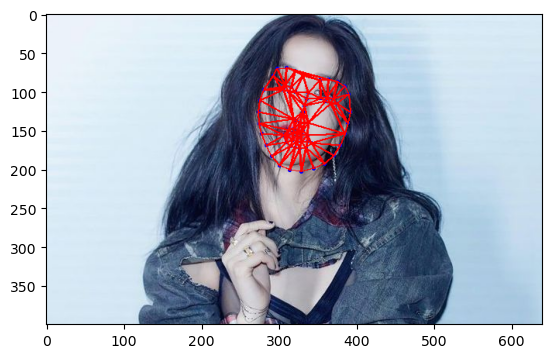

In [22]:
plt.imshow(image_output)

In [16]:
import cv2
import torch
import numpy as np
from PIL import Image, ImageDraw  

def main():
    cap = cv2.VideoCapture(0)  # Mở camera mặc định (0)
    while True:
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)
        if not ret:
            break

        # Chuyển đổi frame OpenCV sang PIL Image
        image_input = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) 

        # Thực hiện inference
        image_result = inference(image_input)

        # Chuyển đổi lại thành frame OpenCV
        frame_result = cv2.cvtColor(np.array(image_result), cv2.COLOR_RGB2BGR)

        # Hiển thị frame
        cv2.imshow("Face Tracking", frame_result)

        if cv2.waitKey(1) & 0xFF == ord('q'):  # Nhấn 'q' để thoát
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


KeyboardInterrupt: 